# 파이토치는 답을 알고 있다

> "경사하강법, 역전파"

- toc: true
- branch: master
- badges: true
- comments: true
- hide: true
- author: 한재수
- categories: [Statistics]

In [ ]:
import torch

## 목표 

- 아래의 코드가 무엇을 하는지 이해하는 것

```python
for epoch in range(10):
    y_hat = model(X)
    loss = loss_fn(y_hat, y)  
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

`-` 파이토치로 모델을 학습시킬 때 위와 같은 코드 형태를 자주 본다

`-` 두루뭉실하게 알고 있던 내용을 확립시키고 싶다

## 모델을 학습시킨다는 것?

`-` 주어진 데이터 $(X, y)$를 잘 분석하여 $X$를 $y$로 맵핑하는 함수 $f$를 추정하는 것이다 ($y\approx f(x)$인 $f$를 찾는 것)

`-` $X$는 설명 변수, $y$는 반응 변수이다

`-` 예컨대 $(X,y)$는 (이미지, 카테고리)일 수 있고 (유저 로그, 매크로 유무)일 수도 있다

`-` 중요한 건 데이터는 $(X,y)$의 형태이며 $X$를 바탕으로 $y$를 추정하고 싶다는 것이다

`-` 즉, 어떤 모델이 있다고 하자

`-` 모델에 인풋으로 $X$를 넣으면 $\hat{y}$이 출력될 텐데 모델이 잘 학습됐다면 $\hat{y}$이 $y$값과 비슷할 것이다

`-` 위 코드에서 `y_hat = model(X)` 부분을 나타낸다

## 회귀모형 가정

`-` 실제로 모델을 학습시키기 위해 간단한 회귀모형을 가정하자

`-` model: $y_i = f(x) = w_0 + w_1x_i + \epsilon_i = 3.5 + 2x_i + \epsilon_i, \quad i = 1,2,\cdots,n$

`-` 벡터로 표현한다면 model: $\mathbf y =  \mathbf X  \mathbf W + \boldsymbol{\epsilon}$

$$\mathbf y = \begin{bmatrix} 
y_1\\ 
y_2\\ 
\vdots\\
y_n
\end{bmatrix},\quad
\mathbf X = \begin{bmatrix} 
1 & x_1\\ 
1 & x_2\\ 
\vdots & \vdots\\
1 & x_n
\end{bmatrix}, \quad
\mathbf W = \begin{bmatrix} 
3.5\\ 
2\\ 
\end{bmatrix},\quad
\boldsymbol \epsilon = \begin{bmatrix} 
\epsilon_1\\ 
\epsilon_2\\ 
\vdots\\
\epsilon_n
\end{bmatrix}
$$

`-` $\mathbf X$: $n\times 2$ 행렬

`-` $\mathbf y$: $n \times 1$ 열벡터

`-` $\mathbf W$: $2\times 1$ 열벡터

`-` $\boldsymbol \epsilon$: $n\times 1$ 열벡터

### 데이터 생성

In [29]:
import matplotlib.pyplot as plt
import torch

In [44]:
torch.manual_seed(26)
n = 100
ones = torch.ones(n)
x, _ = torch.randn(n).sort()
X = torch.stack([ones, x], dim=1)
W = torch.tensor([3.5, 2])
ϵ = torch.randn(n) * 0.5
y = X@W + ϵ
y_without_error = X@W

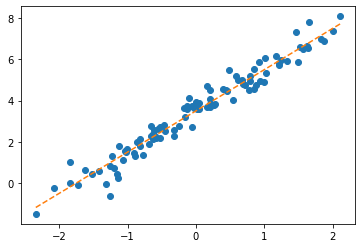

In [45]:
plt.plot(x, y, "o")
plt.plot(x, y_without_error, "--")